In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Example 1

Consider the two numbers

In [2]:
x = 3.141592653589793
y = 3.141592653589791

The difference $z=x-y=2\cdot 10^{-15}$ is in the range of the double format

In [3]:
# exact difference
z = 2e-15
z

2e-15

However, if we compute the difference, we find

In [4]:
# compute difference
comp_z = x-y
comp_z

2.220446049250313e-15

This agrees with the exact answer to about only 1 digits, but what is the meaning of the other digits?

Notice that the relative error is huge:

In [6]:
# relative error
np.abs(z-comp_z)/np.abs(z)

0.11022302462515646

This phenomenon is called cancellation. It occurs when one number is subtracted from another number that is nearly equal to it.

## Example 2: approximating a derivative by a difference quotient

We can approximate the derivative by the slope of the secant line

$$
f^\prime(x) \approx \frac{f(x+h)-f(x)}{h}
$$

The following code evaluates the difference quotient for different values of $h$, at $x=1$, assuming the function if $f(x)=\sin(x)$.
Since we known that the derivative of $\sin(x)$ is $\cos(x)$, the code also compares the derivative to the difference quotient.

In [7]:
# point
x = 1
# exact derivative
der = np.cos(1)

In [8]:
h_list = [10**(-i) for i in range(16)]
h_list

[1,
 0.1,
 0.01,
 0.001,
 0.0001,
 1e-05,
 1e-06,
 1e-07,
 1e-08,
 1e-09,
 1e-10,
 1e-11,
 1e-12,
 1e-13,
 1e-14,
 1e-15]

In [9]:
errors = []
for h in h_list:
    # difference quotient
    approx_der = (np.sin(x+h)-np.sin(x))/h
    # approximation error
    error = np.abs(der-approx_der)
    errors.append(error)

Let us plot the error as a function of $h$ using a log-log scale

Text(0, 0.5, 'error')

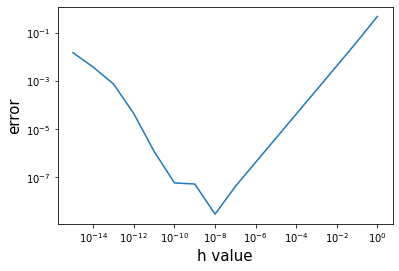

In [12]:
plt.loglog(h_list,errors) 
plt.xlabel('h value', fontsize=15)
plt.ylabel('error', fontsize=15)

We see that the approximation gets better, i.e., the error gets smaller, as $h$ gets smaller. But only up to a certain point.
When $h$ gets too small, the approximation starts to get worse!

## Example 3

Consider the following function 

$$
f(x) = 
\frac{1-\cos(x)}{x^2}
$$



In [13]:
def f(x):
    return (1-np.cos(x))/x**2

At $x=1.2\cdot 10^{-8}$, ,we get

In [14]:
x = 1.2e-8
f(x)

0.7709882115452477

which is clearly wrong given the fact that $0\leq f(x)\leq 0.5$ for all $x\neq 0$.

## Example 4

Consider the function

$$
f(x) = \pi - \sqrt{\pi^2-x}
$$

For small values of $x$, we have

$$
f(x)\approx \frac{x}{2\pi}.
$$


In [16]:
def f(x):
    return np.pi-np.sqrt(np.pi**2-x)

In [17]:
x = np.linspace(1e-14,1e-16,100) # evenly spaced points
x

array([1.0e-14, 9.9e-15, 9.8e-15, 9.7e-15, 9.6e-15, 9.5e-15, 9.4e-15,
       9.3e-15, 9.2e-15, 9.1e-15, 9.0e-15, 8.9e-15, 8.8e-15, 8.7e-15,
       8.6e-15, 8.5e-15, 8.4e-15, 8.3e-15, 8.2e-15, 8.1e-15, 8.0e-15,
       7.9e-15, 7.8e-15, 7.7e-15, 7.6e-15, 7.5e-15, 7.4e-15, 7.3e-15,
       7.2e-15, 7.1e-15, 7.0e-15, 6.9e-15, 6.8e-15, 6.7e-15, 6.6e-15,
       6.5e-15, 6.4e-15, 6.3e-15, 6.2e-15, 6.1e-15, 6.0e-15, 5.9e-15,
       5.8e-15, 5.7e-15, 5.6e-15, 5.5e-15, 5.4e-15, 5.3e-15, 5.2e-15,
       5.1e-15, 5.0e-15, 4.9e-15, 4.8e-15, 4.7e-15, 4.6e-15, 4.5e-15,
       4.4e-15, 4.3e-15, 4.2e-15, 4.1e-15, 4.0e-15, 3.9e-15, 3.8e-15,
       3.7e-15, 3.6e-15, 3.5e-15, 3.4e-15, 3.3e-15, 3.2e-15, 3.1e-15,
       3.0e-15, 2.9e-15, 2.8e-15, 2.7e-15, 2.6e-15, 2.5e-15, 2.4e-15,
       2.3e-15, 2.2e-15, 2.1e-15, 2.0e-15, 1.9e-15, 1.8e-15, 1.7e-15,
       1.6e-15, 1.5e-15, 1.4e-15, 1.3e-15, 1.2e-15, 1.1e-15, 1.0e-15,
       9.0e-16, 8.0e-16, 7.0e-16, 6.0e-16, 5.0e-16, 4.0e-16, 3.0e-16,
       2.0e-16, 1.0e

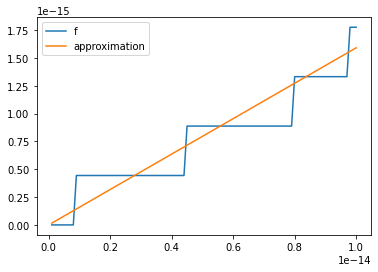

In [25]:
y = f(x)
y_approx = x/(2*np.pi)

plt.plot(x,y,label='f')
plt.plot(x,y_approx, label='approximation')
plt.legend()

Sometimes clever algebra tricks can change an expression into a form that circumvents the problem.

\begin{align*}
f(x) =& \pi - \sqrt{\pi^2-x} = \\
& \left( \pi - \sqrt{\pi^2-x} \right) \frac{\pi + \sqrt{\pi^2-x}}{\pi + \sqrt{\pi^2-x}} = \\
&\frac{x}{\pi + \sqrt{\pi^2-x}}
\end{align*}

In [22]:
def mod_f(x):
    return x/(np.pi+np.sqrt(np.pi**2-x))

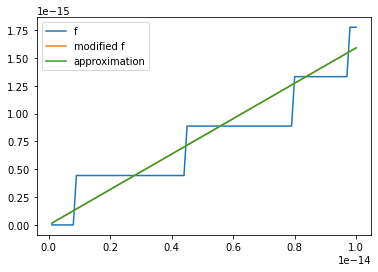

In [24]:
y = f(x)
y_mod = mod_f(x)
y_approx = x/(2*np.pi)

plt.plot(x,y,label='f')
plt.plot(x,y_mod,label='modified f')
plt.plot(x,y_approx, label='approximation')
plt.legend()